# Analyse van 1 variabele

In [31]:
# Importeren van de nodige packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basis visualisatie
from statsmodels.graphics.mosaicplot import mosaic  # Mozaïekdiagram
import seaborn as sns                               # Geavanceerde datavisualisatie
import altair as alt                                # Een alternatief visualisatiesysteem

In Seaborn zitten enkele datasets die we hier zullen gebruiken als voorbeelden.

In [32]:
# Voorbeeld-datasets, meegeleverd met Seaborn
mpg = sns.load_dataset("mpg")      # Eigenschappen van auto's
tips = sns.load_dataset("tips")    # Info over fooien bij restaurantbezoek

We tonen hier de eerste rijen van deze datasets om een idee te krijgen van de inhoud:

In [33]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [34]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Kwalitatieve variabelen

### Visualisatie met staafgrafiek

Er bestaan verschillende Python-libraries om data te visualiseren. We tonen hier hoe je een staafgrafiek kan opstellen enerzijds in Seaborn, en anderzijds in Altair.

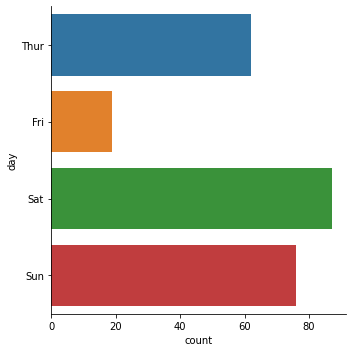

In [35]:
# Staafgrafiek in Seaborn: catplot()
sns.catplot(data = tips, kind = "count", y = "day")

In [36]:
# Staafgrafiek met Altair: mark_bar()
alt.Chart(tips).mark_bar().encode(
    x=alt.X("count()",
            axis=alt.Axis(title="Amount")),
    y=alt.Y("day:O", 
            axis=alt.Axis(title="Weekday")),
    color='day')
# TODO: Volgorde weekdagen wordt niet gerespecteerd 

alt.Chart(...)

### Centrummaten

In [37]:
# Modus voor alle variabelen van de data frame
tips.mode()

,total_bill,tip,sex,smoker,day,time,size
0,13.42,2.0,Male,No,Sat,Dinner,2


In [38]:
# Modus voor een specifieke variabele
tips["day"].mode()

0    Sat
Name: day, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [39]:
# Enkele beschrijvende maten:
tips["day"].describe()

count     244
unique      4
top       Sat
freq       87
Name: day, dtype: object

## Kwantitatieve variabelen

### Visualisatie

<AxesSubplot:xlabel='tip'>

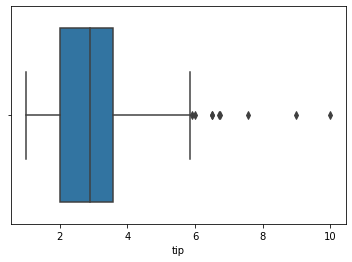

In [40]:
# Visualisatie met boxplot (Seaborn)
sns.boxplot(data = tips, x = "tip")

In [41]:
# Boxplot (Altair)
alt.Chart(tips).mark_boxplot().encode(
    x=alt.X("tip:Q"))

alt.Chart(...)

<AxesSubplot:xlabel='tip'>

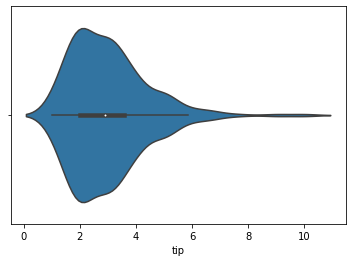

In [42]:
# Violin plot (Seaborn)
sns.violinplot(data = tips, x = "tip")

Hieronder tonen we een plot van de kansdichteit (kde of kernel density estimation).

<AxesSubplot:xlabel='tip', ylabel='Density'>

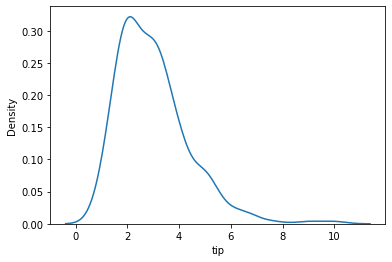

In [43]:
sns.kdeplot(x = tips["tip"])

Gecombineerd met een histogram:

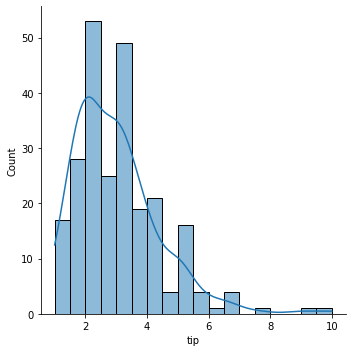

In [44]:
sns.displot(x = tips['tip'], kde=True)

Een histogram met Altair. Een kansdichtheidsplot kan niet met Altair.

In [45]:
# Histogram (Altair)
alt.Chart(tips).mark_bar().encode(
    x=alt.X("tip:Q", bin=True),
    y=alt.Y("count()"))

alt.Chart(...)

### Centrum- en spreidingsmaten

In [46]:
# Centrum- en spreidingsmaten
# Gemiddelde, standaardafwijking & vrienden
print("Gemiddelde:        ", tips["tip"].mean())
print("Standaardafwijking:", tips["tip"].std()) # Let op: n-1 in de noemer!
print("Variantie:         ", tips["tip"].var()) # Let op: n-1 in de noemer!
print("Scheefheid:        ", tips["tip"].skew())
print("Kurtosis:          ", tips["tip"].kurtosis())

# Mediaan & co
print("Minimum:", tips["tip"].min())
print("Mediaan:", tips["tip"].median())
print("Maximum:", tips["tip"].max())
percentielen = [0.0, 0.25, 0.5, 0.75, 1.0]
print("Percentielen", percentielen, "\n", tips["tip"].quantile(percentielen))
print("Interkwartielafstand:", tips["tip"].quantile(.75) - tips["tip"].quantile(.25))

Gemiddelde:         2.99827868852459
Standaardafwijking: 1.3836381890011822
Variantie:          1.914454638062471
Scheefheid:         1.4654510370979401
Kurtosis:           3.648375873352852
Minimum: 1.0
Mediaan: 2.9
Maximum: 10.0
Percentielen [0.0, 0.25, 0.5, 0.75, 1.0] 
 0.00     1.0000
0.25     2.0000
0.50     2.9000
0.75     3.5625
1.00    10.0000
Name: tip, dtype: float64
Interkwartielafstand: 1.5625


In [47]:
# Enkele beschrijvende maten:
tips["tip"].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

## Formule voor standaardafwijking

Waarom gebruiken we $n-1$ in de noemer van de formule voor de standaardafwijking van een steekproef en niet $n$? Deze eerste geeft een betere ("unbiased") schatting voor wat de standaardafwijking in de populatie zal zijn, op basis van onze steekproef. We kunnen dit wiskundig bewijzen, maar dat valt buiten het bereik van deze cursus. We zullen het echter empirisch onderzoeken.

We gaan eerst de functies voor variantie van de populatie en steekproef definiëren:

In [48]:
# Variantie van de populatie
def pop_var(x):
    n = len(x)
    mean = sum(x) / n
    return 1/n * sum((x - mean) ** 2)

# Standaardafwijking van de populatie
def pop_sd(x):
    return np.sqrt(pop_var(x))

# Variantie van een steekproef
def sample_var(x):
    n = len(x)
    mean = sum(x) / n
    return 1/(n-1) * sum((x - mean) ** 2)

# Standaardafwijking van een steekproef
def sample_sd(x):
    return np.sqrt(sample_var(x))

# Als we de variantie berekenen op beide manieren zien we een verschil:
a = np.array([4, 8, 6, 5, 3, 2, 8, 9, 2, 5])

pop_var(a)
sample_var(a)

pop_sd(a)
sample_sd(a)

5.760000000000001

6.3999999999999995

2.4000000000000004

2.5298221281347035

Welke is nu de beste formule voor de standaardafwijking van een steekproef? Laat ons veronderstellen dat onze populatie bestaat uit alle getallen van 0 t/m 100. We berekenen eerst het gemiddelde en standaardafwijking van deze populatie.

In [49]:
population = np.array(range(0, 101))

population_mean = sum(population) / len(population)
print(f'Gemiddelde: {population_mean}')

population_variance = pop_var(population)
print(f'Variantie : {population_variance}')

population_stdev = pop_sd(population)
print(f'Stdev     : {population_stdev}')

Gemiddelde: 50.0
Variantie : 850.0
Stdev     : 29.154759474226502


Nu het eigenlijke experiment: we nemen herhaaldelijk een aselecte steekproef uit deze populatie en kijken naar het resultaat van beide formules voor de variantie. De formule die over een groot aantal iteraties het kortst bij de werkelijke variantie van de populatie komt, zullen we verkiezen.

In [50]:
sample_size = 15            # steekproefgrootte
num_samples = 5000          # aantal keer dat we een steekproef gaan nemen

# We gaan het gemiddelde berekenen van het resultaat met elke formule
# Daarvoor houden we de som bij van deze resultaten en delen achteraf door het
# aantal steekproeven
sum_pop = 0
sum_smp = 0

for _ in range(num_samples):
    sample = np.random.choice(population, size=sample_size)
    sum_pop = sum_pop + pop_sd(sample)
    sum_smp = sum_smp + sample_sd(sample)

print(f"Gemiddelde resultaat met formule populatie: {sum_pop/num_samples}")
print(f"Gemiddelde resultaat met formule steekproef: {sum_smp/num_samples}")


Gemiddelde resultaat met formule populatie: 27.929146073473163
Gemiddelde resultaat met formule steekproef: 28.90941271071824


We zien dat de formule met $n$ als noemer de werkelijke waarde van de standaardafwijking voor de populatie onderschat. De formule met $n-1$ als noemer geeft consistent een betere schatting. Daarom zullen we ook telkens deze formule gebruiken.

Merk op dat we de formule voor variantie en standaardafwijking niet zelf moeten implementeren. Hier hebben we dat gedaan om te tonen hoe deze formules werken. In numpy zitten al functies die doen wat we willen:

In [51]:
a = np.array([1,2,3,4,5])

np.var(a)         # Variantie van de populatie met Numpy
pop_var(a)        # Ter vergelijking onze eigen formule

np.var(a, ddof=1) # Variantie van een steekproef met Numpy
sample_var(a)     # Onze eigen formule

np.std(a)         # Standaardafwijking van de populatie
np.std(a, ddof=1) # Standaardafwijking van een steekproef

2.0

2.0

2.5

2.5

1.4142135623730951

1.5811388300841898